In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import interactive
interactive(True)
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
sns.set()
import statsmodels.api as sm
from scipy import interpolate
from scipy import stats
from scipy import integrate
from scipy.optimize import curve_fit
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

<h1>Calcuations and Figures for Flume Experiments

<h2>1a. Fitting the Data to an Exponential Model, Calculating $k_{t}$

In [2]:
#exp_model_func and lin_model_func were only used for graphing purposes. to fit an exponential model to the data
#stats.linregress (shown in cell below) was used on the log of the mass volume concentration data points. 

def exp_model_func(t, a, k):
    return a*np.exp(k*t)

def lin_model_func(t, a, k):
    return a + k*t

def reynolds_number(freq): #frequency of flume, at either 10, 20, or 30 Hz
    velocity = 0.00196*freq + 0.00081
    return round((velocity*0.003175)/(9.509e-7), 3), velocity

def frontal_area(density):
    return round((density*1.2*0.003175*0.4)/(0.4*1.2), 3)

In [3]:
#plotting invidual experiment runs and the corresponding exponential decay curve

def exp_model_graph(csv_name, exp_settings, plot = 0, fit = 0):
    pump_data = pd.read_csv(csv_name)
    settings = pd.read_csv(exp_settings)
    exp_density = settings[settings['CSV Name'] == csv_name].iloc[0,2]    
    exp_velocity = settings[settings['CSV Name'] == csv_name].iloc[0,3]
    t = pump_data.iloc[:,0]
    y = pump_data.iloc[:,11]
    slope, intercept, r_value, p_value, std_err = stats.linregress(t, np.log(y))
    if plot == 1:
        fig = plt.figure(figsize=(10,7));
        ax = sns.scatterplot(t, y, hue='Location', data=pump_data, s=80);
        plt.title(f"Frontal Area: {frontal_area(exp_density)} $m^{2}/m^{3}$, $Re_{'c'}$: {reynolds_number(exp_velocity)[0]}");
        plt.xlabel('Time (s)');
        plt.ylabel('Mass Volume Concentration (ppm)');
        plt.ylim(0, max(y)+5);
        plt.xlim(0, 6000);
        if fit == 1:
            ax.plot(t, exp_model_func(t, np.exp(intercept), slope))
    elif fit == 1:
        fig = plt.figure(figsize=(10,7));
        ax = sns.lineplot(t, exp_model_func(t,np.exp(intercept), slope));
        plt.title(f"Frontal Area: {frontal_area(exp_density)} $m^{2}/m^{3}$,  $Re_{'c'}$: {reynolds_number(exp_velocity)[0]}");
        plt.xlabel('Time (s)');
        plt.ylabel('Mass Volume Concentration (ppm)');
        plt.ylim(0, max(y)+5);
        plt.xlim(0, 6000);
    return slope, np.exp(intercept), t, r_value

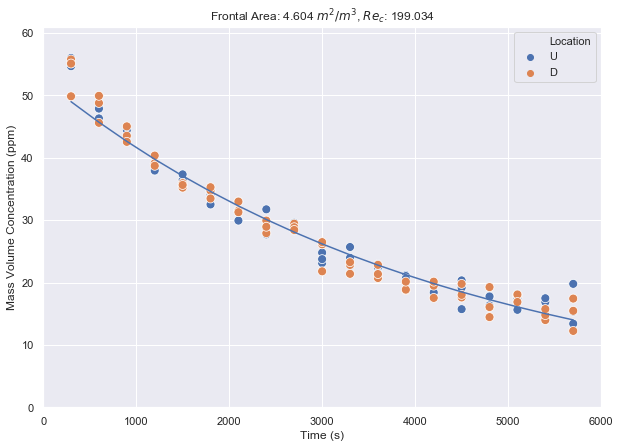

In [4]:
#example using functions defined above
slope, intercept, t, r = exp_model_graph('111518pumpdata.csv','flumeexperimentsettings.csv', plot = 1, fit = 1)

Above is an example of the data from one of our experiment runs and the fitted exponential decay curve. This particular experiment is a high dowel density (1450) and high velocity (30 Hz, or 0.06 m/s) run; the slope is 2.31e-4 and the r-squared is around 96%. This slope was calculated for every experiment run, and used as k (total) in subsequent calculations.

<h3>1b. Slopes of Flume Runs Based on Dowel Density and Velocity

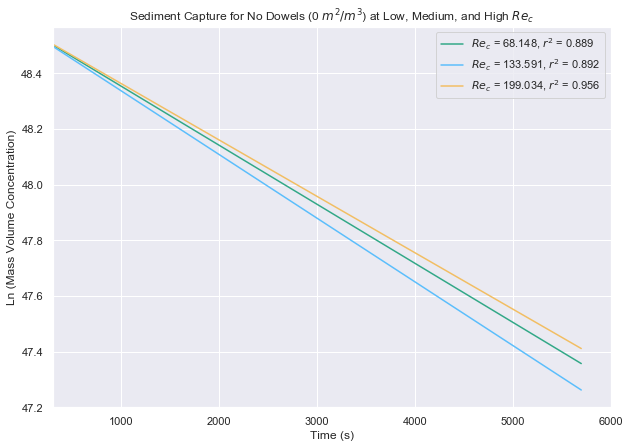

In [5]:
#Control Runs Plots
control_names = ['072919pumpdata.csv','080219pumpdata.csv','032119pumpdata.csv']
control_r = []
control_slopes = []
control_const = []
plt.figure(0, figsize=(10,7));
for i in control_names:
    slope, const, curr_t, curr_r = exp_model_graph(i, 'flumeexperimentsettings.csv', plot = 0, fit = 0)
    control_r.append(curr_r**2)
    control_slopes.append(slope)
    control_const.append(const)
color = ['#32a887','#5bbefc','#f2be63']
counter = 0
for i in control_slopes:
    plt.plot(curr_t, lin_model_func(curr_t, np.mean(control_const), i), color=color[counter])
    counter += 1
plt.xlabel('Time (s)');
plt.ylabel('Ln (Mass Volume Concentration)');
plt.legend([f"$Re_{'c'}$ = {reynolds_number(10)[0]}, $r^{2}$ = {round(control_r[0],3)}", f"$Re_{'c'}$ = {reynolds_number(20)[0]}, $r^{2}$ = {round(control_r[1],3)}", f"$Re_{'c'}$ = {reynolds_number(30)[0]}, $r^{2}$ = {round(control_r[2],3)}"]);
plt.xlim([300,6000]);
plt.title('Sediment Capture for No Dowels (0 $m^{2}/m^{3}$) at Low, Medium, and High $Re_{c}$');

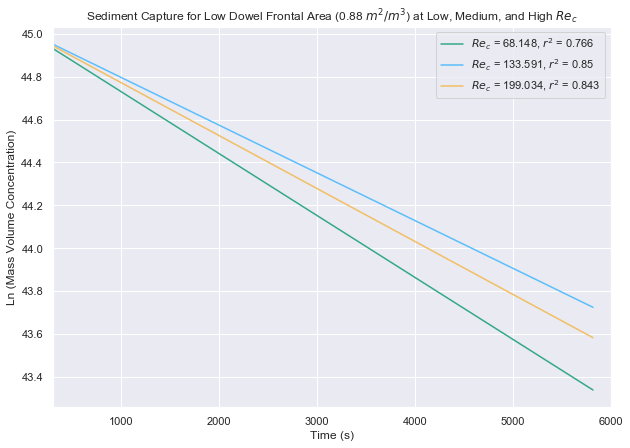

In [6]:
#Low Density Runs Plots
low_dens_names = ['090519pumpdata.csv','092619pumpdata.csv','050619pumpdata.csv']
low_r = []
low_slopes = []
low_const = []
plt.figure(0, figsize=(10,7));
for i in low_dens_names:
    slope, const, curr_t, curr_r = exp_model_graph(i, 'flumeexperimentsettings.csv', plot = 0, fit = 0)
    low_r.append(curr_r**2)
    low_slopes.append(slope)
    low_const.append(const)
color = ['#32a887','#5bbefc','#f2be63']
counter = 0
for i in low_slopes:
    plt.plot(curr_t, lin_model_func(curr_t, np.mean(low_const), i), color=color[counter])
    counter += 1
plt.xlabel('Time (s)');
plt.ylabel('Ln (Mass Volume Concentration)');
plt.legend([f"$Re_{'c'}$ = {reynolds_number(10)[0]}, $r^{2}$ = {round(low_r[0],3)}", f"$Re_{'c'}$ = {reynolds_number(20)[0]}, $r^{2}$ = {round(low_r[1],3)}", f"$Re_{'c'}$ = {reynolds_number(30)[0]}, $r^{2}$ = {round(low_r[2],3)}"]);
plt.xlim([300,6000]);
plt.title('Sediment Capture for Low Dowel Frontal Area (0.88 $m^{2}/m^{3}$) at Low, Medium, and High $Re_{c}$');

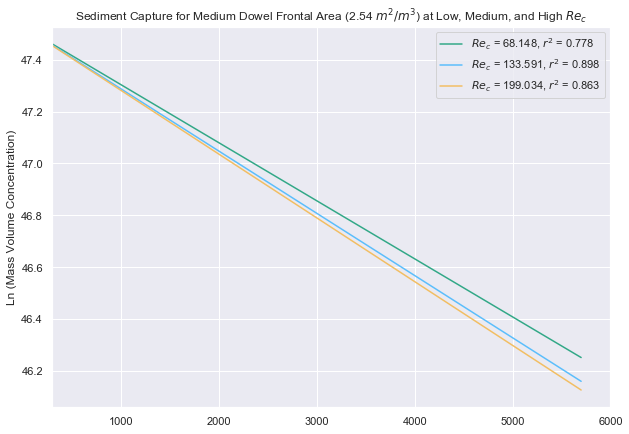

In [7]:
#Med Density Runs Plots
med_dens_names = ['102919pumpdata.csv','021120pumpdata.csv','061219pumpdata.csv']
med_r = []
med_slopes = []
med_const = []
plt.figure(0, figsize=(10,7));
for i in med_dens_names:
    slope, const, curr_t, curr_r = exp_model_graph(i, 'flumeexperimentsettings.csv', plot = 0, fit = 0)
    med_r.append(curr_r**2)
    med_slopes.append(slope)
    med_const.append(const)
color = ['#32a887','#5bbefc','#f2be63']
counter = 0
for i in med_slopes:
    plt.plot(curr_t, lin_model_func(curr_t, np.mean(med_const), i), color=color[counter])
    counter += 1
plt.ylabel('Ln (Mass Volume Concentration)');
plt.legend([f"$Re_{'c'}$ = {reynolds_number(10)[0]}, $r^{2}$ = {round(med_r[0],3)}", f"$Re_{'c'}$ = {reynolds_number(20)[0]}, $r^{2}$ = {round(med_r[1],3)}", f"$Re_{'c'}$ = {reynolds_number(30)[0]}, $r^{2}$ = {round(med_r[2],3)}"]);
plt.xlim([300,6000]);
plt.title('Sediment Capture for Medium Dowel Frontal Area (2.54 $m^{2}/m^{3}$) at Low, Medium, and High $Re_{c}$');

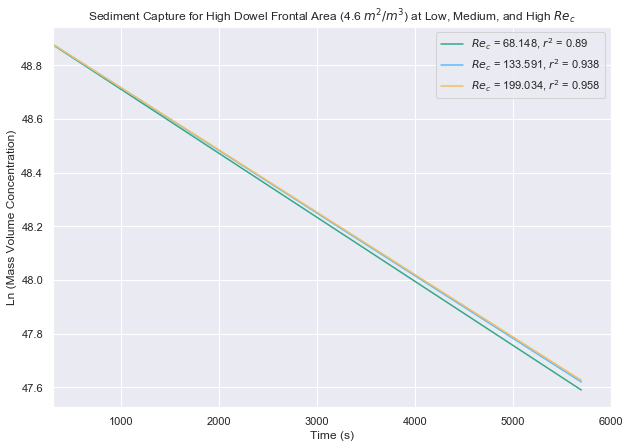

In [8]:
#High Density Runs Plots
high_dens_names = ['030320pumpdata.csv','031320pumpdata.csv','111518pumpdata.csv']
high_r = []
high_slopes = []
high_const = []
plt.figure(0, figsize=(10,7));
for i in high_dens_names:
    slope, const, curr_t, curr_r = exp_model_graph(i, 'flumeexperimentsettings.csv', plot = 0, fit = 0)
    high_r.append(curr_r**2)
    high_slopes.append(slope)
    high_const.append(const)
color = ['#32a887','#5bbefc','#f2be63']
counter = 0
for i in high_slopes:
    plt.plot(curr_t, lin_model_func(curr_t, np.mean(high_const), i), color=color[counter])
    counter += 1
plt.xlabel('Time (s)');
plt.ylabel('Ln (Mass Volume Concentration)');
plt.legend([f"$Re_{'c'}$ = {reynolds_number(10)[0]}, $r^{2}$ = {round(high_r[0],3)}", f"$Re_{'c'}$ = {reynolds_number(20)[0]}, $r^{2}$ = {round(high_r[1],3)}", f"$Re_{'c'}$ = {reynolds_number(30)[0]}, $r^{2}$ = {round(high_r[2],3)}"]);
plt.xlim([300,6000]);
plt.title('Sediment Capture for High Dowel Frontal Area (4.6 $m^{2}/m^{3}$) at Low, Medium, and High $Re_{c}$');

In order to directly compare just the slopes, I averaged the starting concentration for each set of dowel treatments (control, low, medium, high) and graphed them starting from this same average value. The low dowel density treatment seems to have the most variability in terms of k<sub>t</sub>, whereas the k<sub>t</sub> for high dowel density treatment all seem to be very similar.  

<h3>2. Calculating Particle Capture Rate & Estimated Collector Efficiency

In [9]:
#test section settling averaged across all nine traps, and scaled only by the area of sediment trap
def test_section_settling(csv_name, plot = 0):
    csv_name = csv_name[0:6] + 'sedtrap.csv'
    sample = pd.read_csv(csv_name)
    sample = sample[0:9]
    indices = list(sample[sample['Sediment'].notnull()].index)
    sample = sample.iloc[indices,:]
    sediment_settled = (np.mean(sample['Sediment']*0.001))/(np.pi*0.0127**2) 
    #sediment_settled is not scaled by the area of the test section or (flume - test section)!! you need to 
    #include this scaling in later calculations
    return sediment_settled

In [10]:
#open channel settled sediment calculation (Justin's method)
open_channel_sed_10 = test_section_settling('072919pumpdata.csv') * 1.98

open_channel_sed_20 = test_section_settling('080219pumpdata.csv') * 1.98

open_channel_sed_30 = test_section_settling('032119pumpdata.csv') * 1.98

#I put these into a list form to make it easier to parse out later:
open_channel_settled = [open_channel_sed_10, open_channel_sed_20, open_channel_sed_30]

In [11]:
def coll_efficiency(m_s, k_t, frequency, stem_density):
    stem_diam = 0.003175 #this is in meters
    if stem_density == 0: #if control run, set k_settling = k_total (the assumption is that all settling is due 
        #only to graviational settling during a control run -- mass settled outside of test section accounted for
        #in the total sediment settled variable (m_s))
        k_s = k_t
        k_c = k_t - k_s 
    else: #not control run
        numerator = m_s*k_t
        denominator = 200*(1-np.exp(-k_t*6000))
        k_s = numerator/denominator
        k_c = k_t - k_s
        vol_flume = 2.43
        vol_test_section = 1.95*0.6*0.4
        k_c = k_c*(vol_flume/vol_test_section)
    collector_efficiency = k_c/(reynolds_number(frequency)[1] * stem_diam * stem_density)
    return k_s, k_c, collector_efficiency

<h2>Equation Explanation

These are the equations I used to calculate $k_{s}$, $k_{c}$, and effective collector efficiency— 

<div>
<img src="k_s_equation.png" width="225"/>
</div>

In the equation above, $m_{s}$ is the total mass settled both side the test section and outside. Mass of sediment settled inside the test section was calculated by scaling the average sediment mass settled per sediment trap area ($g/m^{2}$) by the area of the test section ($1.95\ m * 0.6\ m$). To calculate sediment settled outside of the test section, the average sediment mass settled per sediment trap area ONLY for the control runs at 10, 20 and 30 Hz were scaled by the area of the flume not including the test section ($1.98\ m^{2}$). 

In the table below, the meta-data is loaded into this notebook with all the relevant information about how each experiment was done (which flume frequency, which stem density, whether the run was biofouled or not). In calculating $k_{s}$, the code goes (in a for loop) through this table of meta-data to see which frequency each experiment was done at, and adds the corresponding mass settled outside of the test section to the settling within the test section (settling within the test section is specific to each experiment, whereas settling outside is not). 

$k_{c}$ (collection rate) was calculated as the difference between $k_{t}$ (total decay rate) and $k_{s}$ (rate of settling due to gravity only). This $k_{c}$ was then scaled by the ratio between the volume of the entire flume and the volume of the vegetated area. The equation looks like:

<div>
<img src="k_c_equation.png" width="225"/>
</div>

Effective collector efficiency was then calculated from $k_{c}$, using the equation as described in the Fauria paper (where $d_{c}$ is stem diameter, $I_{c}$ is stem density, and u is flow velocity) as: 

<div>
<img src="efficiency_eqn.png" width="125"/>
</div>

All of these calculations are done in the cell directly below. 

In [12]:
run_variables = pd.read_csv('flumeexperimentsettings.csv')
run_variables = run_variables.drop([5,11,12]) #drop 5 (anomolous results), 11 & 12 (extra-low density runs)
#defining empty lists to append data to later:
re_c_array = []
frontal_area_array = []
k_t_array = []
m_s_array = []
k_s_array = []
k_c_array = []
efficiencies = []
for i in range(len(run_variables)):
    curr_name = run_variables['CSV Name'].iloc[i] #reading in CSV file
    slope, intercept, t, r = exp_model_graph(curr_name, 'flumeexperimentsettings.csv') #calculating k_t using
    #exponential model defined in 3rd cell (above)
    k_t = -1*slope
    current_frequency = run_variables['Velocity'].iloc[i]
    current_stem_density = run_variables['Density'].iloc[i]   
    #using Justin's method: calculating settling both inside and outside of test section, and adding these two
    #to calculate total settling throughout flume (m_s) — the amount of sediment settled outside the test section
    #varies based on Re, and they were calculated two cells above this one (above eqn. explanation).
    if current_frequency == 10:
        open_channel_sediment = open_channel_settled[0]
    elif current_frequency == 20:
        open_channel_sediment = open_channel_settled[1]
    elif current_frequency == 30:
        open_channel_sediment = open_channel_settled[2]
    m_s = (test_section_settling(curr_name) * 1.95 * 0.6) + open_channel_sediment
    #calculating k_s, k_c, and n' using function (called coll_efficiency) defined in cell above this one
    k_s, k_c, efficiency = coll_efficiency(m_s, k_t, current_frequency, current_stem_density)
    
    #appending all lists (defined outside of for loop) with data calculated (in the lines above this) of current file
    re_c_array.append(reynolds_number(current_frequency)[0])
    frontal_area_array.append(frontal_area(current_stem_density))
    k_t_array.append(k_t)
    m_s_array.append(m_s)
    k_s_array.append(k_s)
    k_c_array.append(k_c)
    efficiencies.append(efficiency*100) #now it is a percentage 
    
#adding these data arrays to the entire data table
run_variables['Re_c'] = re_c_array
run_variables['Frontal Area'] = frontal_area_array
run_variables['k_t'] = k_t_array
run_variables['m_s'] = m_s_array
run_variables['k_s'] = k_s_array
run_variables['k_c'] = k_c_array
run_variables['ECE %'] = efficiencies
run_variables['ECE %'] = run_variables['ECE %'].replace([np.NaN], int(0))

In [13]:
run_variables

,Date,CSV Name,Density,Velocity,Biofouled,Re_c,Frontal Area,k_t,m_s,k_s,k_c,ECE %
0,10192018,101918pumpdata.csv,0,30,0,199.034,0.000,0.000165,75.994536,0.000165,0.000000,0.000000
1,11152018,111518pumpdata.csv,1450,30,0,199.034,4.604,0.000232,63.460702,0.000098,0.000695,0.253431
2,12042018,120418pumpdata.csv,1450,30,1,199.034,4.604,0.000296,64.962530,0.000116,0.000935,0.340839
3,1312019,013119pumpdata.csv,1450,30,1,199.034,4.604,0.000435,63.047964,0.000148,0.001489,0.542498
4,3212019,032119pumpdata.csv,0,30,0,199.034,0.000,0.000203,75.994536,0.000203,0.000000,0.000000
6,5062019,050619pumpdata.csv,278,30,0,199.034,0.883,0.000247,70.604247,0.000113,0.000695,1.321372
7,6122019,061219pumpdata.csv,800,30,0,199.034,2.540,0.000246,69.406120,0.000111,0.000701,0.463090
8,7012019,070119pumpdata.csv,800,30,1,199.034,2.540,0.000274,63.915773,0.000109,0.000859,0.567663
9,7292019,072919pumpdata.csv,0,10,0,68.148,0.000,0.000212,100.888584,0.000212,0.000000,0.000000
10,8022019,080219pumpdata.csv,0,20,0,133.591,0.000,0.000229,50.395941,0.000229,0.000000,0.000000


In [14]:
#run this cell to output a csv file of the parameters and calculated variables
run_variables.to_csv(r'ECE_no_k_bg.csv', index = False)

In [15]:
run_variables_copy = run_variables.rename(columns = {'Re_c': '$Re_{c}$','m_s': '$m_{s} (g)$', 'k_t': '$k_{t}$', 'k_s': '$k_{s}$', 'k_c': '$k_{c}$'})
run_variables_copy

,Date,CSV Name,Density,Velocity,Biofouled,$Re_{c}$,Frontal Area,$k_{t}$,$m_{s} (g)$,$k_{s}$,$k_{c}$,ECE %
0,10192018,101918pumpdata.csv,0,30,0,199.034,0.000,0.000165,75.994536,0.000165,0.000000,0.000000
1,11152018,111518pumpdata.csv,1450,30,0,199.034,4.604,0.000232,63.460702,0.000098,0.000695,0.253431
2,12042018,120418pumpdata.csv,1450,30,1,199.034,4.604,0.000296,64.962530,0.000116,0.000935,0.340839
3,1312019,013119pumpdata.csv,1450,30,1,199.034,4.604,0.000435,63.047964,0.000148,0.001489,0.542498
4,3212019,032119pumpdata.csv,0,30,0,199.034,0.000,0.000203,75.994536,0.000203,0.000000,0.000000
6,5062019,050619pumpdata.csv,278,30,0,199.034,0.883,0.000247,70.604247,0.000113,0.000695,1.321372
7,6122019,061219pumpdata.csv,800,30,0,199.034,2.540,0.000246,69.406120,0.000111,0.000701,0.463090
8,7012019,070119pumpdata.csv,800,30,1,199.034,2.540,0.000274,63.915773,0.000109,0.000859,0.567663
9,7292019,072919pumpdata.csv,0,10,0,68.148,0.000,0.000212,100.888584,0.000212,0.000000,0.000000
10,8022019,080219pumpdata.csv,0,20,0,133.591,0.000,0.000229,50.395941,0.000229,0.000000,0.000000


<h2>Not Relevant: Estimating Mass of Sediment Settled within Test Section using Thin-Plate Spline Interpolation

To calculate the estimated collector efficiency for each experiment, I followed the methods that Justin used in his thesis. I estimated sediment settled within the test section by first using thin-plate spline interpolation of the sediment trap data, and I estimated sediment settled outside of the test section by averaging the sediment settled within the sediment traps for the control runs at 10, 20 and 30 Hz. These two estimations were added and used in the equation shown below to find k<sub>s</sub> (k settled). An example of the thin plate spline interpolation for high density (1450 dowels/m<sup>2</sup>) and high velocity (30 Hz) is shown below.

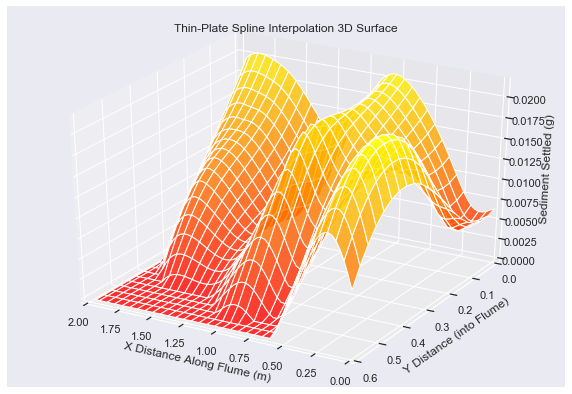

In [16]:
#thin-plate spline interpolation and integration of surface to find sediment settled in test section
def create_line(x, y, z):
    xs = [x]*2
    ys = [y]*2
    zs = [0, z]
    return xs, ys, zs

def test_section_settling(csv_name, plot = 0):
    csv_name = csv_name[0:6] + 'sedtrap.csv'
    sample = pd.read_csv(csv_name)
    sample = sample[0:9]
    indices = list(sample[sample['Sediment'].notnull()].index)
    x_pos = np.array([0.15, 0.15, 0.15, 0.745, 0.93, 1.15, 1.75, 1.75, 1.75])
    y_pos = np.array([0.11, 0.3, 0.51, 0.44, 0.3, 0.14, 0.11, 0.3, 0.51])
    x = x_pos[indices]
    y = y_pos[indices]
    z = (np.array(sample['Sediment'][indices])*0.001)/(np.pi*0.0127**2)
    interp = interpolate.Rbf(x, y, z, function = 'thin_plate')
    xi, yi = np.meshgrid(np.arange(0, 1.96, 0.03), np.arange(0, 0.61, 0.03))
    zi = interp(xi, yi)
    zi[zi <0] = 0
    zi = zi*0.03*0.03
    w = sum(sum(zi))
    if plot == 1:
        fig = plt.figure(figsize=(10,7))
        ax = plt.axes(projection='3d');
        ax.plot_surface(X = xi, Y = yi, Z = zi, cmap = 'autumn', alpha = 0.8);
        #for point in range(len(x)):
            #xs, ys, zs = create_line(x[point], y[point], z[point]*0.03*0.03)
            #ax.plot(xs, ys, zs, c = 'black', linewidth = 3)
        ax.set_xlim(2, 0)
        ax.set_ylim(0.6, 0)
        ax.set_zlabel('Sediment Settled (g)');
        ax.set_xlabel('X Distance Along Flume (m)');
        ax.set_ylabel('Y Distance (into Flume)');
        ax.set_title('Thin-Plate Spline Interpolation 3D Surface');
    return w

w = test_section_settling('111518pumpdata.csv', plot = 1)

The thin plate spline interpolation predicts how much sediment settled within the test section for 1300 3 cm by 3 cm grids based on the sediment trap data collected during each run. 0 m along the x-axis is upstream, and 2 m along the x-axis is downstream. These values were summed to calculate the total amount of sediment (in grams) settled throughout the test section. I changed negative predicted values to 0.


<h2>End of Interpolation. Plotting Below

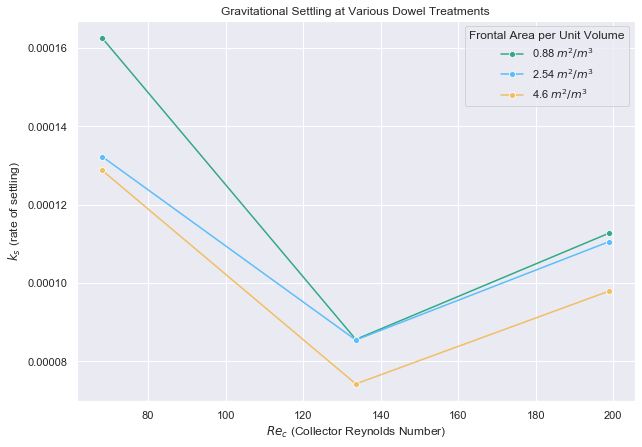

In [17]:
kc_low = run_variables[(run_variables['Frontal Area']==0.883) & (run_variables['Biofouled']==0)].sort_values('Velocity')
kc_med = run_variables[(run_variables['Frontal Area']==2.540) & (run_variables['Biofouled']==0)].sort_values('Velocity')
kc_high = run_variables[(run_variables['Frontal Area']==4.604) & (run_variables['Biofouled']==0)].sort_values('Velocity')
plt.figure(8, figsize=(10,7))
sns.lineplot(kc_low['Re_c'], kc_low['k_s'], marker = 'o', color = '#32a887');
sns.lineplot(kc_med['Re_c'], kc_med['k_s'], marker = 'o', color = '#5bbefc');
sns.lineplot(kc_high['Re_c'], kc_high['k_s'], marker = 'o', color = '#f2be63');
plt.ylabel('$k_{s}$ (rate of settling)');
plt.xlabel('$Re_{c}$ (Collector Reynolds Number)');
plt.legend(['0.88 $m^{2}/m^{3}$', '2.54 $m^{2}/m^{3}$', '4.6 $m^{2}/m^{3}$'], title = 'Frontal Area per Unit Volume');
plt.title('Gravitational Settling at Various Dowel Treatments');

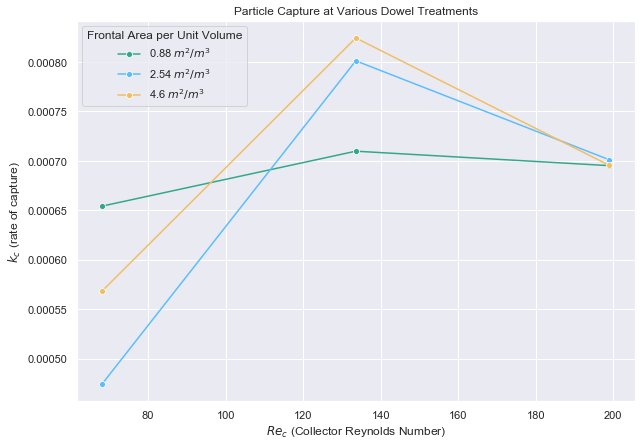

In [18]:
#particle capture vs. velocity for each dowel density
#kc_control = run_variables[(run_variables['Density']==0) & (run_variables['Biofouled']==0)].drop(0).sort_values('Velocity')
kc_low = run_variables[(run_variables['Frontal Area']==0.883) & (run_variables['Biofouled']==0)].sort_values('Velocity')
kc_med = run_variables[(run_variables['Frontal Area']==2.540) & (run_variables['Biofouled']==0)].sort_values('Velocity')
kc_high = run_variables[(run_variables['Frontal Area']==4.604) & (run_variables['Biofouled']==0)].sort_values('Velocity')
plt.figure(8, figsize=(10,7))
sns.lineplot(kc_low['Re_c'], kc_low['k_c'], marker = 'o', color = '#32a887');
sns.lineplot(kc_med['Re_c'], kc_med['k_c'], marker = 'o', color = '#5bbefc');
sns.lineplot(kc_high['Re_c'], kc_high['k_c'], marker = 'o', color = '#f2be63');
plt.ylabel('$k_{c}$ (rate of capture)');
plt.xlabel('$Re_{c}$ (Collector Reynolds Number)');
plt.legend(['0.88 $m^{2}/m^{3}$', '2.54 $m^{2}/m^{3}$', '4.6 $m^{2}/m^{3}$'], title = 'Frontal Area per Unit Volume');
plt.title('Particle Capture at Various Dowel Treatments');

Above is a plot of capture rate (k<sub>c</sub>) vs velocity for each dowel treatment. K<sub>c</sub> for the control runs was 0, as there were no dowels to capture sediment, so I left the control runs off of the plot.

In [19]:
control = run_variables[run_variables['Density']==0]
ext_low = run_variables[run_variables['Density']==232]
low = run_variables[(run_variables['Density']==278) & (run_variables['Biofouled']==0)].sort_values('Velocity')
med =  run_variables[(run_variables['Density']==800)  & (run_variables['Biofouled']==0)].sort_values('Velocity')
high = run_variables[(run_variables['Density']==1450) & (run_variables['Biofouled']==0)].sort_values('Velocity')

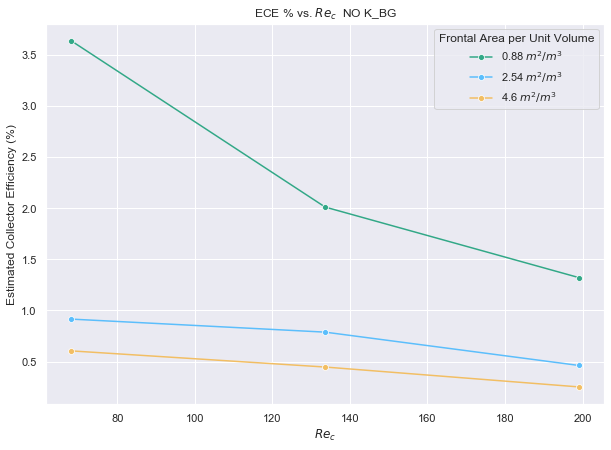

In [20]:
plt.figure(6, figsize=(10,7))
sns.lineplot(low['Re_c'], low['ECE %'], marker = 'o', color = '#32a887')
sns.lineplot(med['Re_c'], med['ECE %'], marker = 'o', color = '#5bbefc')
sns.lineplot(high['Re_c'], high['ECE %'], marker = 'o', color = '#f2be63')
plt.xlabel('$Re_{c}$')
plt.ylabel('Estimated Collector Efficiency (%)');
plt.title('ECE % vs. $Re_{c}$  NO K_BG')
plt.legend(['0.88 $m^{2}/m^{3}$', '2.54 $m^{2}/m^{3}$', '4.6 $m^{2}/m^{3}$'], title = 'Frontal Area per Unit Volume');

Above I plotted the ECE % vs. velocity for each dowel treatment. I left the control runs off the plot because the values for the control runs are NaN. 

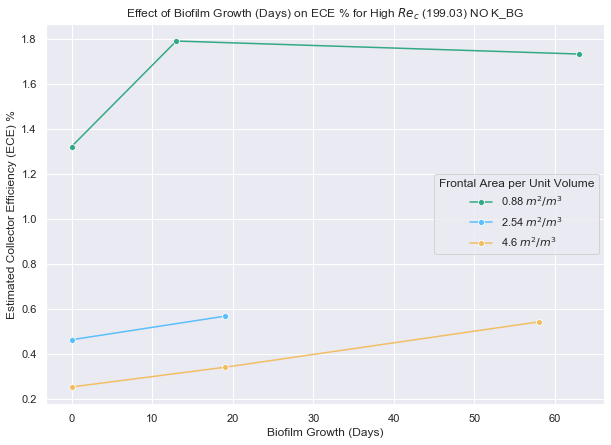

In [21]:
#collector efficiency as a result of biofouling: high density runs
high_biofouled = run_variables[(run_variables['Density']==1450) & (run_variables['Velocity']==30)]
high_biofouled['Biofilm Growth (Days)'] = [0, 19, 58]
med_biofouled = run_variables[(run_variables['Density']==800)  & (run_variables['Velocity']==30)]
med_biofouled['Biofilm Growth (Days)'] = [0, 19]
low_biofouled = run_variables[(run_variables['Density']==278)  & (run_variables['Velocity']==30)]
low_biofouled['Biofilm Growth (Days)'] = [0, 13, 63]
plt.figure(7, figsize=(10,7))
sns.lineplot(low_biofouled['Biofilm Growth (Days)'], low_biofouled['ECE %'], color = '#32a887', marker = 'o');
sns.lineplot(med_biofouled['Biofilm Growth (Days)'], med_biofouled['ECE %'], color = '#5bbefc', marker = 'o');
sns.lineplot(high_biofouled['Biofilm Growth (Days)'], high_biofouled['ECE %'], color = '#f2be63', marker = 'o');
plt.ylabel('Estimated Collector Efficiency (ECE) %');
plt.legend(['0.88 $m^{2}/m^{3}$', '2.54 $m^{2}/m^{3}$', '4.6 $m^{2}/m^{3}$'], title = 'Frontal Area per Unit Volume');
plt.title('Effect of Biofilm Growth (Days) on ECE % for High $Re_{c}$ (199.03) NO K_BG');

I plotted the ECE% against biofilm growth days for the biofouled run in order to see how naturally growing biofilm, as well as the synthetic biofilm used during non-biofouled experiments, affected the capture efficiency. The biofilm growth is a rough estimate, as I just counted how many days passed since we last drained flume before doing a biofouled experiment run. Biofilm growth for low density treatment seems to have the greatest effect on ECE%, and the high density dowel treatment has the least effect on ECE %.